In [9]:
x = int(input())
y = int(input())

z = int(input())

5
4
2


In [10]:
(x if x > y else y) if (x if x > y else y) > z else z

5

In [3]:
y = input()

3


In [4]:
x = x if x > y else y

In [5]:
x

'3'

## Importing Required Libraries

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from random import sample, randrange, uniform
import numpy as np

## Loading MNIST Dataset

In [3]:
MNIST = datasets.load_digits()

In [4]:
MNIST

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [5]:
y = MNIST['target']
y.shape

(1797,)

In [6]:
images = MNIST['images']
images.shape

(1797, 8, 8)

In [7]:
X = MNIST['data']
X.shape

(1797, 64)

Expected Digit :  7


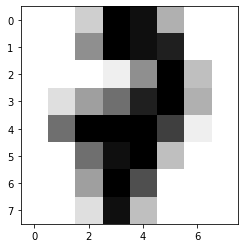

In [8]:
#Selecting a random index everytime
idx = randrange(0, y.shape[0]+1)

plt.imshow(images[idx], cmap = plt.cm.gray_r, interpolation='nearest')
print("Expected Digit : ", y[idx])
plt.show()

## K-Means Clusting Class

In [9]:
class K_Means:
    
    def __init__(self, k=2, tol=.0001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        
        # 1. Random Initialization of Centroid
        self.centroids = {}
        c_idx = 0
        for i in sample(range(0, data.shape[0]), self.k):
            self.centroids[c_idx] = data[i]
            c_idx += 1
        
        for itr in range(self.max_iter):
            
            # 2. Assigning a class to all the data points according to the selected centroids
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            
            for d_point in data:
                #using Euclidean / Frobenius norm of vector to calculate distance
                dist = [np.linalg.norm(d_point - self.centroids[centroid_idx]) for centroid_idx in self.centroids]
                class_ = np.argmin(dist)
                #print(dist)
                self.classifications[class_].append(d_point)
            
            
            # 3. Recomputing / updating the centroids
            old_centroids = self.centroids.copy() #First lets save the previous k centroids
            #print(old_centroids, self.centroids, "old")
            
            for class_ in self.classifications:
                #print(self.classifications, self.centroids)
                self.centroids[class_] = np.average(self.classifications[class_], axis = 0)
                #print(old_centroids, self.centroids, "up")
            
            # 4. Check for convergence
            optimal = True

            for c_idx in self.centroids:
                
                old_centroid = old_centroids[c_idx]
                updated_centroid = self.centroids[c_idx]
                
                if(np.linalg.norm(old_centroid - updated_centroid) > self.tol):
                #if(np.sum((updated_centroid - old_centroid) / old_centroid*100) > self.tol):
                    optimal = False
                    
            #print(optimal, 'X', itr)
            if optimal == True:
                #print(old_centroids, self.centroids)
                self.centroids = old_centroids
                break

    def predict(self, data):
        #using Euclidean / Frobenius norm of vector to calculate distance
        dist = [np.linalg.norm(data - self.centroids[centroid_idx]) for centroid_idx in self.centroids]
        class_ = np.argmin(dist)
        
        return class_

## Testing our model on a small test dataset with only 2 features for visualization and testing

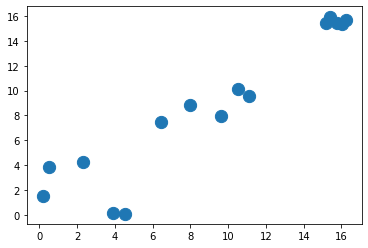

[[ 4.56  0.09]
 [10.54 10.12]
 [15.16 15.44]
 [ 0.17  1.51]
 [11.08  9.6 ]
 [16.03 15.37]
 [ 0.53  3.87]
 [ 6.46  7.44]
 [16.25 15.72]
 [ 3.91  0.17]
 [ 7.96  8.88]
 [15.79 15.49]
 [ 2.32  4.22]
 [ 9.63  7.92]
 [15.38 15.97]]


In [10]:
#Creating a random dataset with two set of clusters

n_points = 15
n_features = 2
n_clusters = 3

test_X = np.zeros((n_points, n_features))


low_limit = [0, 5]#lower cluster limits
up_limit = [6, 13]#upper cluster limits
_limit = [15, 17]
limits = [low_limit, up_limit, _limit]

clust_switch = 0
for n_p in range(n_points):
    point = []
    for n_f in range(n_features):
        point.append(round(uniform(limits[clust_switch][0], limits[clust_switch][1]), 2))
    
    clust_switch += 1
    if clust_switch >= n_clusters:
        clust_switch = 0
    
    test_X[n_p] = point

    
    

plt.scatter(test_X[:,0], test_X[:,1], s=150)
plt.show()

print(test_X)

colors = ["g","r","c","b","k"]

In [13]:
clf = K_Means(k=3)
clf.fit(test_X)

[15.16 15.44]
[16.03 15.37]
[16.25 15.72]
[15.79 15.49]
[15.38 15.97]
[4.56 0.09]
[0.17 1.51]
[0.53 3.87]
[3.91 0.17]
[2.32 4.22]
[10.54 10.12]
[11.08  9.6 ]
[6.46 7.44]
[7.96 8.88]
[9.63 7.92]


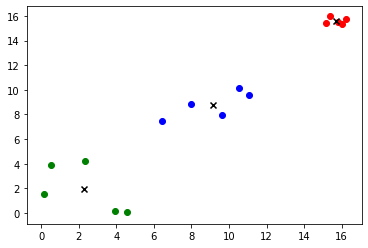

In [14]:
colors = ['r', 'g', 'b', 'c','m','y', 'w']

for class_ in clf.classifications:
    for point in clf.classifications[class_]:
        print(point)
        plt.scatter(point[0], point[1], color = colors[class_],  marker = 'o')

for c_idx in clf.centroids:
    plt.scatter(clf.centroids[c_idx][0], clf.centroids[c_idx][1], marker = 'x', color = 'black')

In [15]:
clf.predict(np.array([5.5,5.5]))

1

## Using our model for MNIST Dataset

In [20]:
X_classified = {}
for x in range(10):
    c_idx = [i for i in range(len(y)) if y[i] == x]
    X_classified[x] = X[c_idx]      
        

#### Spilting out original dataset according to thier classes

In [24]:
X_classified[9][i for i in range(len(y)) if y[i] == x]

180

In [30]:
K = [4, 6, 8, 10, 20]
y_pred = {}

for k in K:
    # fitting the dataset to various values of k
    MNIST_clf = K_Means(k)
    MNIST_clf.fit(X)
    
    y_temp = {}
    for class_ in range(10):
            y_temp[class_] = []
            for x in X_classified[class_]:
                #capturing the predicted new cluster number for our classified dataset
                y_temp[class_].append(MNIST_clf.predict(x))
        
    y_pred[k] = y_temp


print(y_pred)

{0: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], 1: [6, 2, 2, 2, 2, 2, 2, 6, 6, 2, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 8, 6, 2, 2, 2, 5, 2, 6, 6, 2, 6, 2, 2, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 8, 6, 2, 6, 6, 2, 6, 2, 6, 6, 6, 6, 6, 8, 8, 2, 4, 4, 8, 8, 4, 8, 

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred[10])

array([[  0,   0,   0,   0,   0,   0,   0, 176,   2,   0],
       [  1,   0,   1,  56,  24,  98,   0,   0,   2,   0],
       [  0,  13,  10,   3, 147,   1,   1,   1,   0,   1],
       [  2,   8, 158,   0,   1,   1,   6,   0,   0,   7],
       [  0,   0,   0,  43,   0,  10,   0,   0, 110,  18],
       [136,   0,   1,   0,   0,   0,  40,   0,   5,   0],
       [  0,   0,   0,   1,   0,   1,   0,   1, 178,   0],
       [  0,   0,   0,   4,   0,   2,   0,   0,   0, 173],
       [  5, 138,   0,   3,   2,  20,   3,   0,   1,   2],
       [  5,   2,   3,  20,   0,   0, 142,   0,   0,   8]], dtype=int64)

In [63]:
# Here we can see that the new cluster number doesn't match the original clusters

In [39]:
def class_freq(lst):
    freq = {}
    for elem in lst:
        try:
            freq[elem] += 1
        except:
            freq[elem] = 1
    return freq

In [52]:
for cluster in K:
    print("\n", cluster, "Clusters")
    for class_ in range(10):
        print(class_, class_freq(y_pred[cluster][class_]))


 4 Clusters
0 {0: 173, 3: 3, 2: 2}
1 {1: 117, 2: 57, 3: 8}
2 {1: 155, 2: 7, 3: 14, 0: 1}
3 {3: 167, 1: 14, 2: 2}
4 {2: 155, 0: 23, 1: 3}
5 {3: 84, 1: 82, 2: 12, 0: 4}
6 {0: 177, 1: 2, 2: 2}
7 {2: 125, 1: 54}
8 {3: 48, 1: 97, 2: 28, 0: 1}
9 {3: 147, 1: 3, 2: 30}

 6 Clusters
0 {1: 166, 2: 7, 3: 5}
1 {4: 107, 3: 40, 5: 23, 2: 3, 1: 9}
2 {4: 9, 5: 151, 3: 2, 1: 13, 0: 2}
3 {1: 159, 5: 9, 0: 9, 4: 6}
4 {3: 162, 4: 3, 2: 2, 0: 12, 5: 2}
5 {1: 83, 5: 87, 0: 3, 3: 5, 2: 3, 4: 1}
6 {2: 176, 4: 4, 1: 1}
7 {0: 172, 3: 4, 4: 2, 5: 1}
8 {1: 54, 4: 94, 2: 2, 3: 2, 5: 14, 0: 8}
9 {1: 146, 0: 13, 3: 19, 5: 2}

 8 Clusters
0 {0: 177, 6: 1}
1 {1: 131, 5: 23, 4: 25, 2: 2, 7: 1}
2 {1: 10, 4: 151, 3: 3, 5: 12, 0: 1}
3 {5: 162, 3: 9, 4: 3, 1: 8, 7: 1}
4 {6: 169, 1: 2, 3: 10}
5 {5: 40, 7: 138, 6: 2, 2: 2}
6 {2: 176, 1: 4, 0: 1}
7 {3: 177, 1: 2}
8 {1: 105, 7: 5, 5: 50, 0: 1, 2: 1, 4: 4, 3: 8}
9 {5: 153, 3: 13, 1: 4, 6: 6, 7: 4}

 10 Clusters
0 {9: 176, 2: 2}
1 {6: 106, 2: 35, 8: 9, 5: 25, 3: 2, 1: 1, 4: 4}


In [62]:
ass_X = [[0, 9],
[1, 6],
[2, 5],
[3, 8],
[4, 2],
[5, 1],
[6, 3],
[7, 0],
[8, 7],
[9, 4]]
print_table(ass_X, ["Original Cluster", "Assigned Cluster"])

Output Shape : ( 10 , 2 )

+------------------+------------------+
| Original Cluster | Assigned Cluster |
+------------------+------------------+
|        0         |        9         |
|        1         |        6         |
|        2         |        5         |
|        3         |        8         |
|        4         |        2         |
|        5         |        1         |
|        6         |        3         |
|        7         |        0         |
|        8         |        7         |
|        9         |        4         |
+------------------+------------------+


In [61]:
from prettytable import PrettyTable
def print_table(val, cols, limit = 0):#limit = 0 : all outputs will be printed
    x = PrettyTable()

    x.field_names = cols
    
    count = 0
    not_printed = 0
    for i in val:
        if type(i) == str:
            i = [i]
        if(count >= limit and limit != 0): #Dumping all the extra rows from the MySQLcusrsor
            not_printed += 1
            continue
        x.add_row(i)
        count += 1

    print("Output Shape : (", count + not_printed,",", len(cols), ")\n")
    print(x)